<a href="https://colab.research.google.com/github/satyamsrj/-Teen-Smartphone-Usage-Analysis/blob/main/web_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import load_model

model = load_model("emotion.h5")

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import cv2
import numpy as np
import base64

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
      document.body.appendChild(div);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      video.remove();

      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = base64.b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

In [ ]:
from keras.models import load_model
model = load_model('emotion.h5', compile=False)

In [ ]:
from keras.models import load_model

model = load_model('emotion.h5', compile=False)
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def preprocess_face(face):
    face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    face = cv2.resize(face, (48, 48))
    face = face.astype('float32') / 255.0
    face = np.expand_dims(face, axis=0)
    face = np.expand_dims(face, axis=-1)
    return face

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


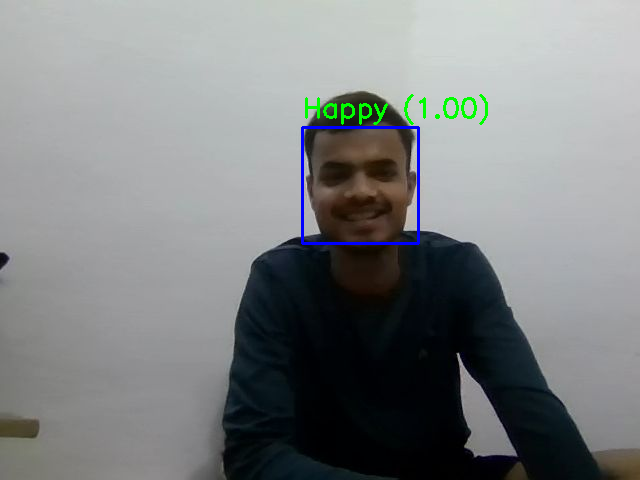

In [ ]:
filename = take_photo()

img = cv2.imread(filename)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(img, scaleFactor=1.3, minNeighbors=5)

for (x, y, w, h) in faces:
    face = img[y:y+h, x:x+w]
    processed = preprocess_face(face)
    prediction = model.predict(processed)
    emotion = labels[np.argmax(prediction)]
    confidence = prediction.max()

    # Draw rectangle and label
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.putText(img, f"{emotion} ({confidence:.2f})", (x, y-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

from google.colab.patches import cv2_imshow
cv2_imshow(img)